In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import shape, MultiPolygon, Polygon, Point
import Data.Notebooks.util as util

## Data processing

### Countries GeoJson

In [4]:
with open("Data/Raw/europe.geojson", "r") as f:
    geojson_data = json.load(f)

In [10]:
def plot_country(ax, country, fill_color=False):
    # Loop through each feature and plot the geometry
    for feature in geojson_data['features']:
        geom = shape(feature['geometry'])
        name = feature['properties']['NAME']
        if name != country: continue
        
        if isinstance(geom, Polygon):
            x, y = geom.exterior.xy
            ax.plot(x, y, color='black', linewidth=0.5)
            if fill_color:
                ax.fill(x, y, color=fill_color)
        elif isinstance(geom, MultiPolygon):
            for poly in geom.geoms:
                x, y = poly.exterior.xy
                ax.plot(x, y, color='black', linewidth=0.5)
                if fill_color:
                    ax.fill(x, y, color=fill_color)

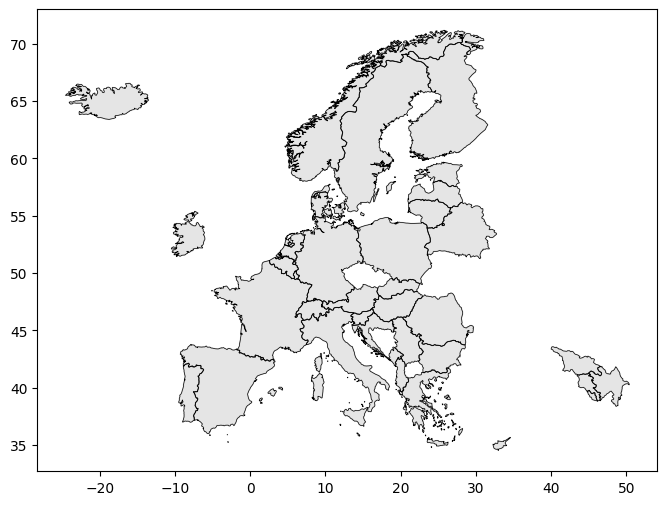

In [14]:
# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

for country in vars(util.COUNTRIES).values():
    plot_country(ax, country, fill_color="#00000020")

plt.show()